# 1. Descriptive Statistics

## 1.1. Load Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/raw/raw_analyst_ratings/raw_analyst_ratings.csv", parse_dates=['date'])

# Preview data
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


## 1.2.  Headline Length Statistics

Headline Length Statistics:
 count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


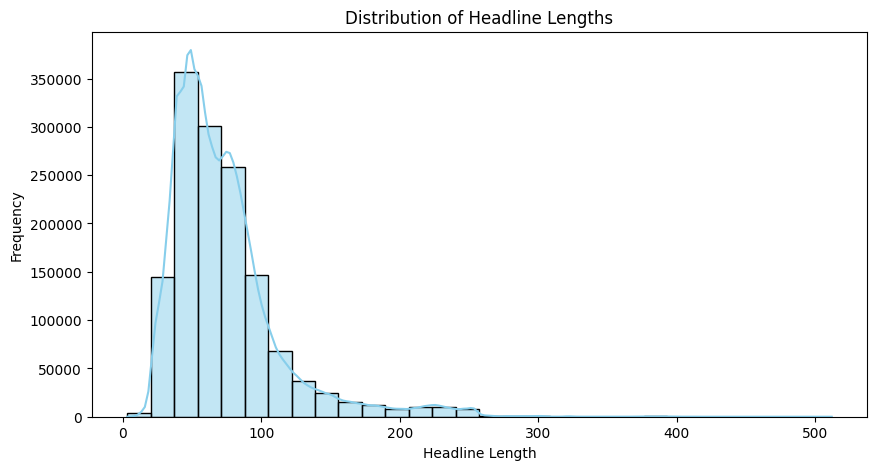

In [2]:
# Add headline length column
df['headline_length'] = df['headline'].astype(str).apply(len)

# Basic statistics
headline_stats = df['headline_length'].describe()
print("Headline Length Statistics:\n", headline_stats)

# Optional: visualize distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['headline_length'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Headline Lengths")
plt.xlabel("Headline Length")
plt.ylabel("Frequency")
plt.show()


## 1.3. Article Count per Publisher

Top 10 Publishers:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


/tmp/ipykernel_865/4240244471.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.head(10).values, y=publisher_counts.head(10).index, palette="viridis")


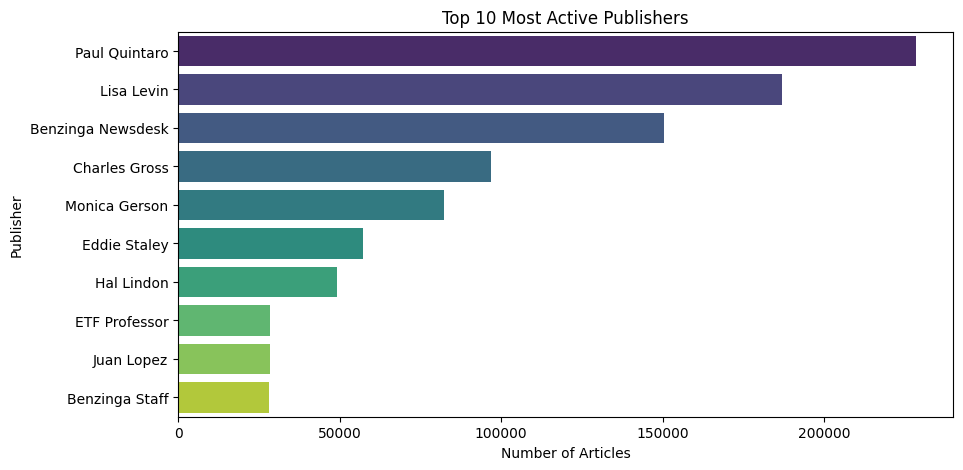

In [3]:
# Count articles by publisher
publisher_counts = df['publisher'].value_counts()

print("Top 10 Publishers:\n", publisher_counts.head(10))

# Optional: visualize top publishers
plt.figure(figsize=(10, 5))
sns.barplot(x=publisher_counts.head(10).values, y=publisher_counts.head(10).index, palette="viridis")
plt.title("Top 10 Most Active Publishers")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.show()


## 1.4. Analyze Publication Dates

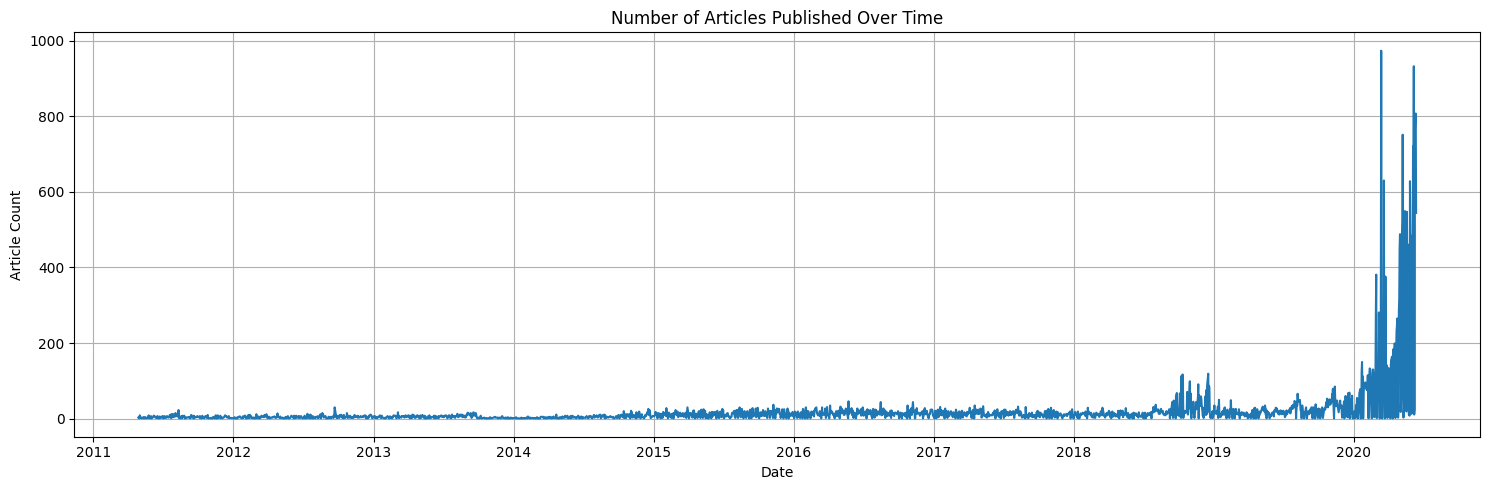

/tmp/ipykernel_865/3222735912.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="Set2")


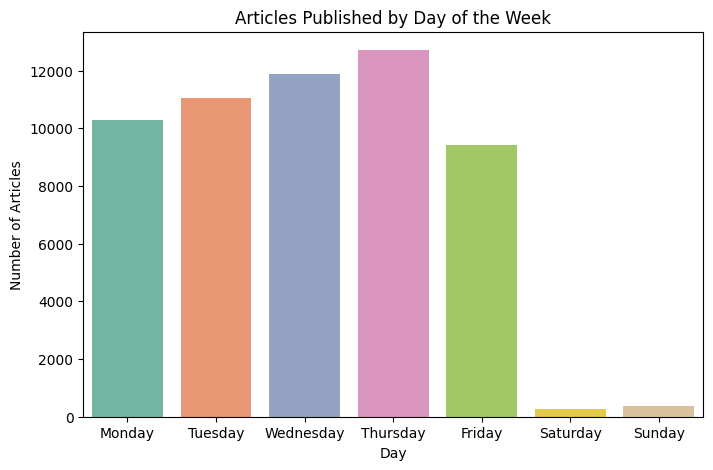

In [4]:
# Ensure datetime is in correct format
df['date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')

# Create additional date features
df['publish_day'] = df['date'].dt.date
df['publish_weekday'] = df['date'].dt.day_name()

# Articles published per day
daily_counts = df.groupby('publish_day').size()

plt.figure(figsize=(15, 5))
daily_counts.plot()
plt.title("Number of Articles Published Over Time")
plt.xlabel("Date")
plt.ylabel("Article Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribution by day of the week
weekday_counts = df['publish_weekday'].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

plt.figure(figsize=(8, 5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="Set2")
plt.title("Articles Published by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Articles")
plt.show()


# 2. Text Analysis(Topic Modeling):

## 2.1. Preprocessing Headlines

In [5]:
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

# Download stopwords if not done already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Clean and preprocess headlines
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text

df['clean_headline'] = df['headline'].apply(clean_text)


[nltk_data] Downloading package stopwords to /home/ashe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 ## 2.2. Keyword Frequency (Bag-of-Words)

/tmp/ipykernel_865/402653604.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='keyword', data=keyword_freq, palette='cubehelix')


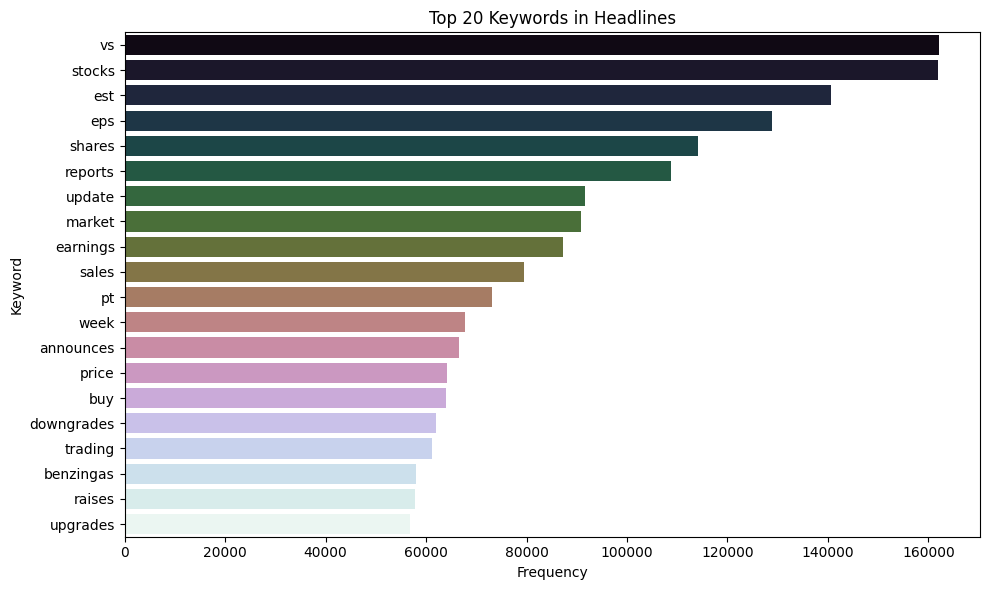

In [6]:
# Count most common words
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['clean_headline'])

# Get top keywords
keywords = vectorizer.get_feature_names_out()
counts = X.sum(axis=0).A1
keyword_freq = pd.DataFrame({'keyword': keywords, 'count': counts})
keyword_freq = keyword_freq.sort_values(by='count', ascending=False)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='keyword', data=keyword_freq, palette='cubehelix')
plt.title('Top 20 Keywords in Headlines')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()


## 2.3. Topic Modeling using LDA

In [7]:
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize using CountVectorizer (Bag of Words)
vectorizer = CountVectorizer(stop_words='english', max_df=0.9, min_df=10)
X = vectorizer.fit_transform(df['clean_headline'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display topics
def print_topics(model, feature_names, n_top_words):
    for idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic #{idx + 1}: {' | '.join(top_words)}")

print("Top Words per Topic:")
print_topics(lda, vectorizer.get_feature_names_out(), n_top_words=8)


Top Words per Topic:
Topic #1: pt | buy | target | raises | maintains | price | downgrades | upgrades
Topic #2: earnings | trading | shares | companies | scheduled | higher | lower | stocks
Topic #3: vs | est | eps | stocks | reports | sales | session | moving
Topic #4: market | shares | update | biggest | yesterday | movers | new | week
Topic #5: says | announces | reports | new | estimate | beats | deal | ceo


# 3. Time Series Analysis

## 3.1 Frequency of Articles Over Time

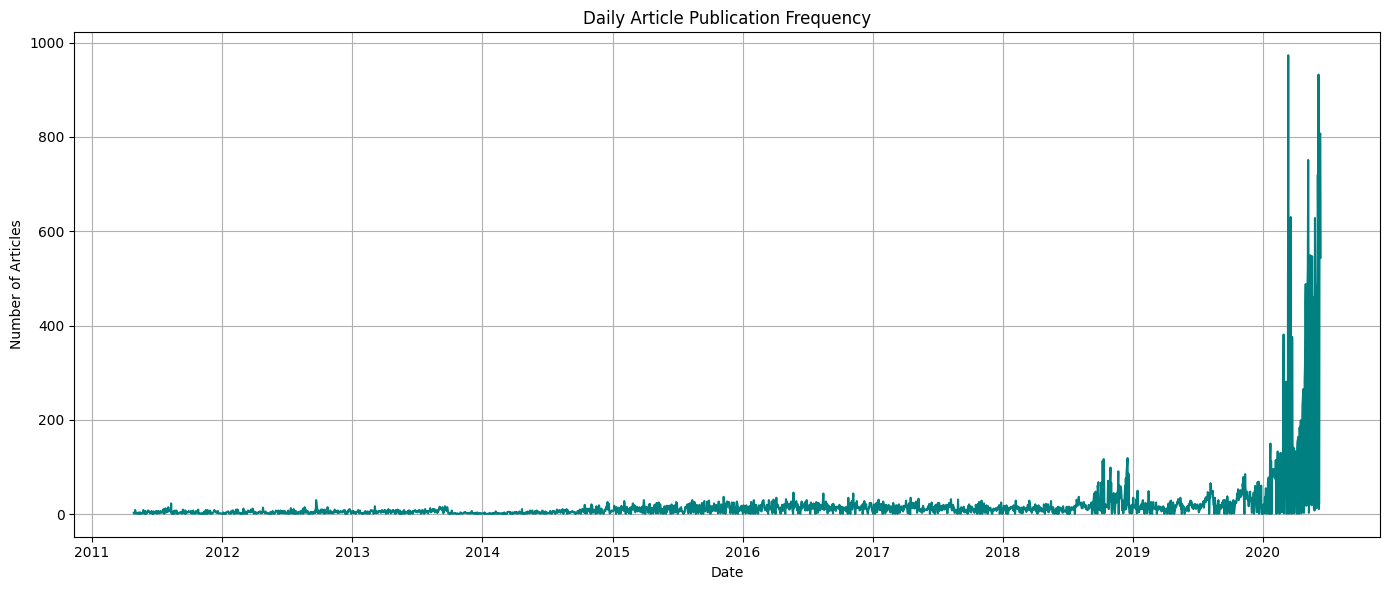

In [8]:
# Group by date (day-level)
daily_freq = df.groupby(df['date'].dt.date).size()

# Plot daily frequency
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
daily_freq.plot(kind='line', color='teal')
plt.title("Daily Article Publication Frequency")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()


## 3.2. Weekly Aggregation (Smoother Trend)

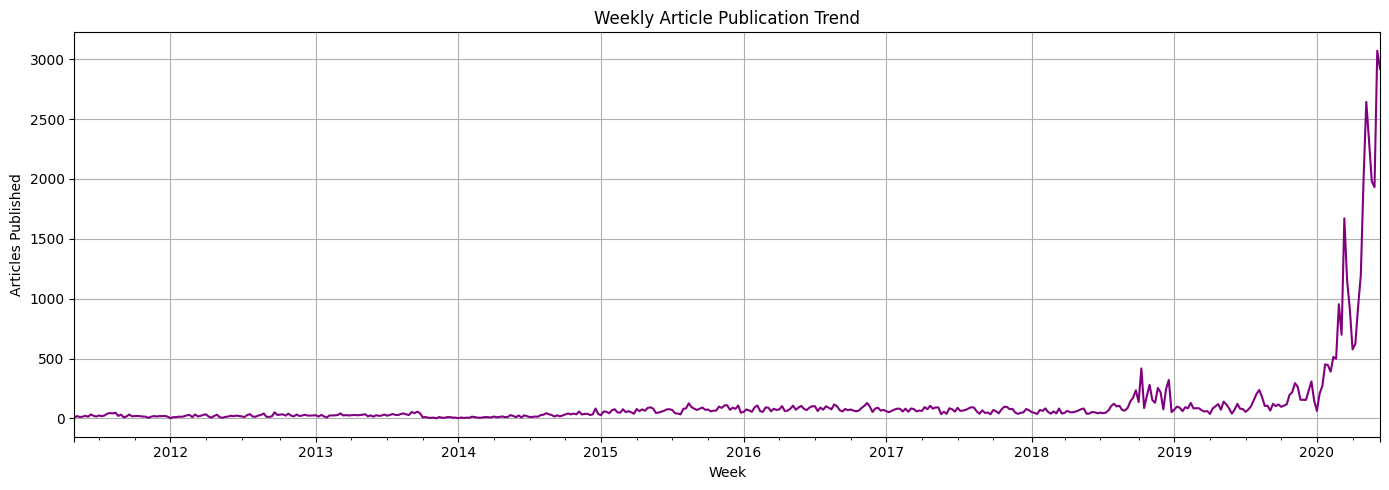

In [9]:
# Set datetime index for resampling
df_ts = df.copy()
df_ts['date'] = pd.to_datetime(df_ts['date'], utc=True)
df_ts.set_index('date', inplace=True)

# Weekly frequency
weekly_freq = df_ts['headline'].resample('W').count()

# Plot weekly trend
plt.figure(figsize=(14, 5))
weekly_freq.plot(color='purple')
plt.title("Weekly Article Publication Trend")
plt.xlabel("Week")
plt.ylabel("Articles Published")
plt.tight_layout()
plt.grid(True)
plt.show()


## 3.3. Identify Spikes in Publication Frequency

Significant spike days:
 date
2020-02-27    275
2020-02-28    381
2020-03-06    281
2020-03-11    282
2020-03-12    973
2020-03-19    630
2020-03-23    376
2020-03-24    160
2020-04-09    164
2020-04-13    184
2020-04-15    186
2020-04-16    199
2020-04-17    194
2020-04-20    181
2020-04-21    232
2020-04-22    246
2020-04-23    265
2020-04-24    246
2020-04-27    283
2020-04-28    317
2020-04-29    449
2020-04-30    488
2020-05-01    385
2020-05-04    347
2020-05-05    478
2020-05-06    529
2020-05-07    751
2020-05-08    508
2020-05-11    485
2020-05-12    388
2020-05-13    549
2020-05-14    536
2020-05-15    322
2020-05-18    547
2020-05-19    332
2020-05-20    461
2020-05-21    333
2020-05-22    286
2020-05-26    628
2020-05-27    492
2020-05-28    465
2020-05-29    309
2020-06-01    484
2020-06-02    361
2020-06-03    720
2020-06-04    538
2020-06-05    932
2020-06-08    765
2020-06-09    803
2020-06-10    807
2020-06-11    544
dtype: int64


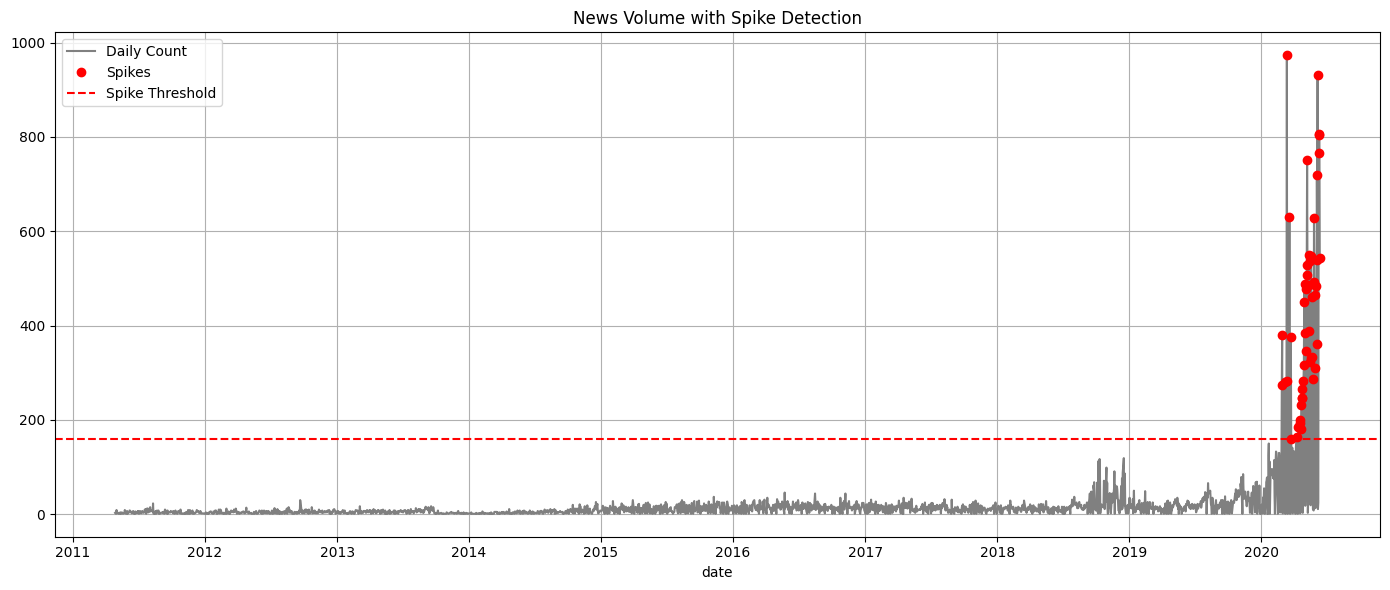

In [10]:
# Find spikes: days where count > mean + 2*std
mean_freq = daily_freq.mean()
std_freq = daily_freq.std()
spike_threshold = mean_freq + 2 * std_freq

spike_days = daily_freq[daily_freq > spike_threshold]

print("Significant spike days:\n", spike_days)

# Highlight spikes on the plot
plt.figure(figsize=(14, 6))
daily_freq.plot(color='gray', label='Daily Count')
spike_days.plot(style='ro', label='Spikes')
plt.axhline(spike_threshold, color='red', linestyle='--', label='Spike Threshold')
plt.title("News Volume with Spike Detection")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 3.4. Hourly Publication Pattern

/tmp/ipykernel_865/4167266572.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='Blues_d')


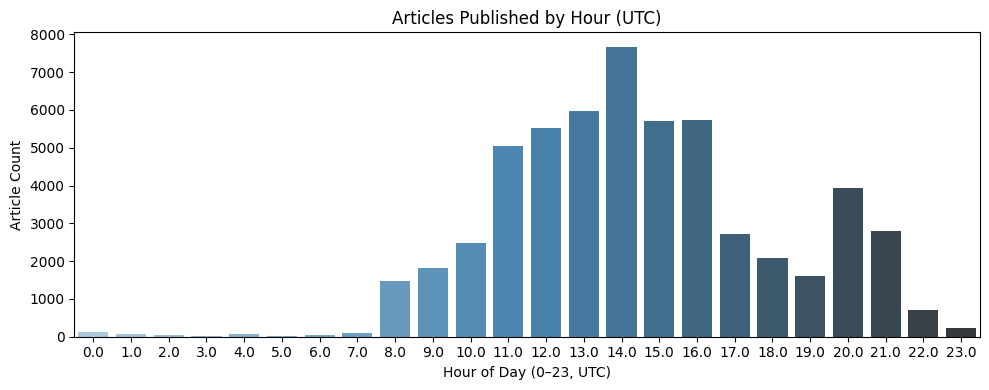

In [11]:
# Extract hour from datetime
df['publish_hour'] = df['date'].dt.hour

# Count articles by hour
hourly_counts = df['publish_hour'].value_counts().sort_index()

# Plot
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='Blues_d')
plt.title("Articles Published by Hour (UTC)")
plt.xlabel("Hour of Day (0–23, UTC)")
plt.ylabel("Article Count")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()
